### **About the Dataset**
The dataset comprises of sales data for multiple types of drugs. A selected group of drugs from the dataset of 57 drugs have been taken, which are classified to following Anatomical Therapeutic Chemical (ATC) Classification System categories:

* M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
* M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
* N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
* N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
* N05B - Psycholeptics drugs, Anxiolytic drugs
* N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
* R03 - Drugs for obstructive airway diseases
* R06 - Antihistamines for systemic use

**Reference:** https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data

#### **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import datetime as dt
from pandas.plotting import register_matplotlib_converters

In [4]:
daily = pd.read_csv("/Users/ashitashetty/Downloads/Pharma Sales/salesdaily.csv")
weekly = pd.read_csv("/Users/ashitashetty/Downloads/Pharma Sales/salesweekly.csv")
monthly = pd.read_csv("/Users/ashitashetty/Downloads/Pharma Sales/salesmonthly.csv")

In [5]:
print("Daily data shape: {}".format(daily.shape))
print("Weekly data shape: {}".format(weekly.shape))
print("Monthly data shape: {}".format(monthly.shape))

Daily data shape: (2106, 13)
Weekly data shape: (302, 9)
Monthly data shape: (70, 9)


**Descriptive Statistics of the data**

In [7]:
daily.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [8]:
weekly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


In [9]:
monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


### **Data Pre-Processing**

**Checking for Null Values**

In [11]:
daily.isnull().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [12]:
weekly.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [13]:
monthly.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

* All the 3 taken into consideration have no null values 

**Converting data type of 'datum' column from object to datetime**

In [16]:
daily['datum'] = pd.to_datetime(daily['datum'], format = '%m/%d/%Y')
weekly['datum'] = pd.to_datetime(weekly['datum'], format = '%m/%d/%Y')
monthly['datum'] = pd.to_datetime(monthly['datum'], format = '%Y-%m-%d')

#Setting date as index of the dataset
#daily.set_index('datum', inplace=True)
#weekly.set_index('datum', inplace=True)
#monthly.set_index('datum', inplace=True)

#### **Monthly Data Forecasting**

In [18]:
#Extracting date, month and year into separate columns for ease of EDA

monthly['year'] = monthly['datum'].dt.year
monthly['month'] = monthly['datum'].dt.month
monthly['day'] = monthly['datum'].dt.day


In [19]:
#Setting date as index of the dataset
monthly.set_index('datum', inplace=True)

In [20]:
#Creating a numerical column list from all the columns in the 'monthly' table
monthly.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'year', 'month', 'day'],
      dtype='object')

In [21]:
num_col_list = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

**EDA**

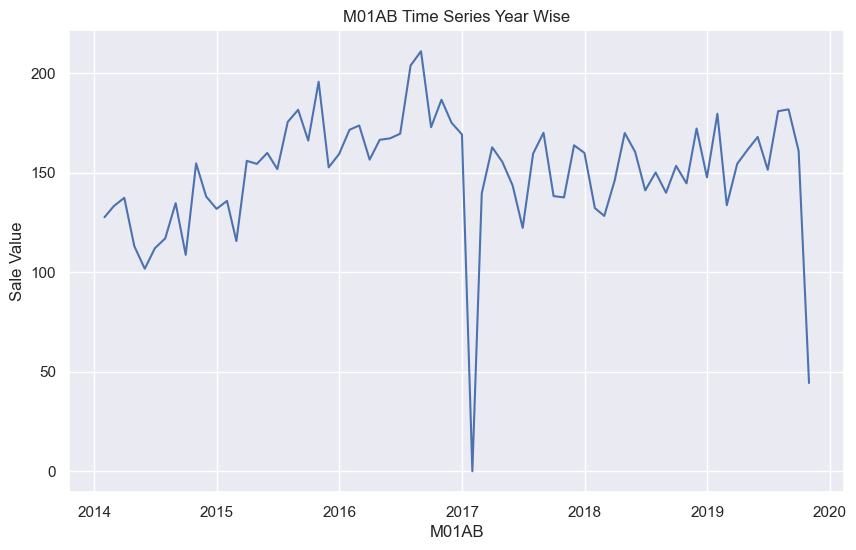

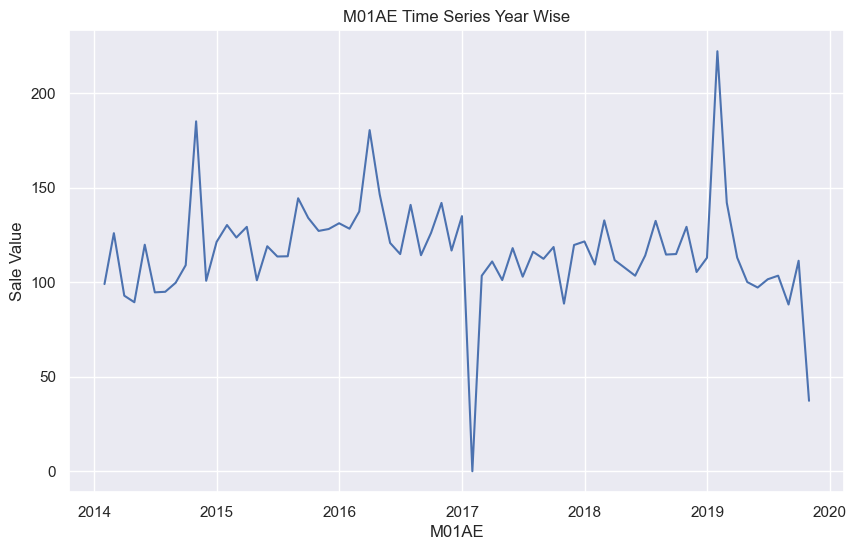

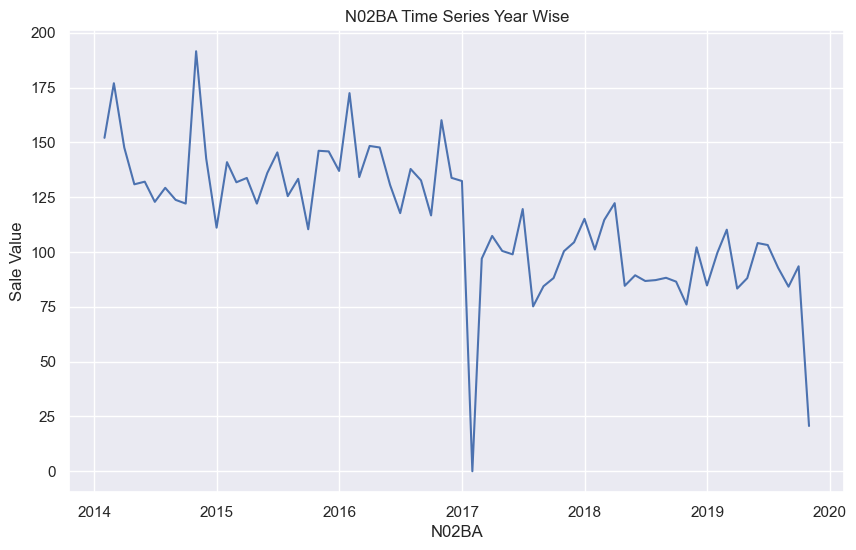

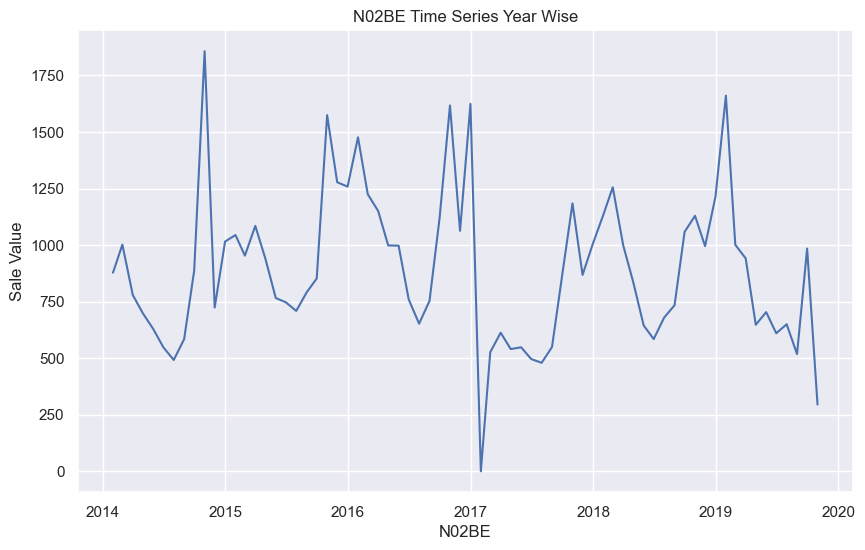

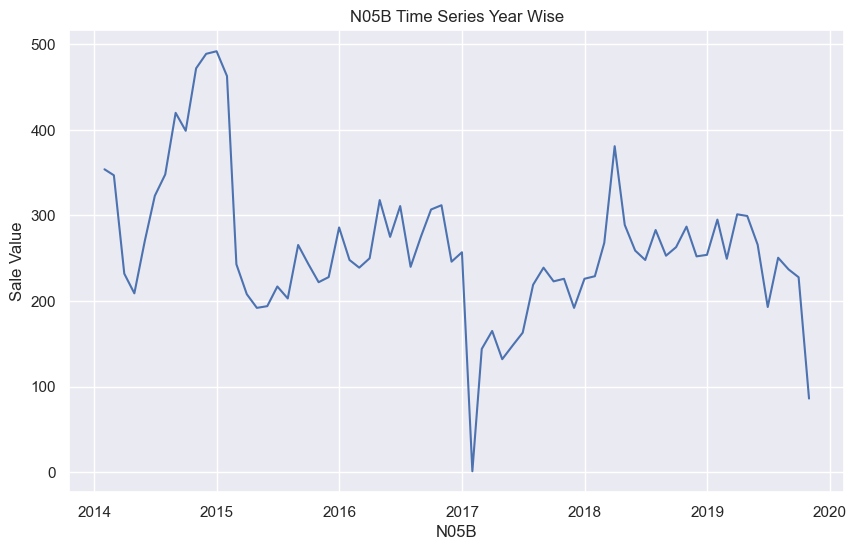

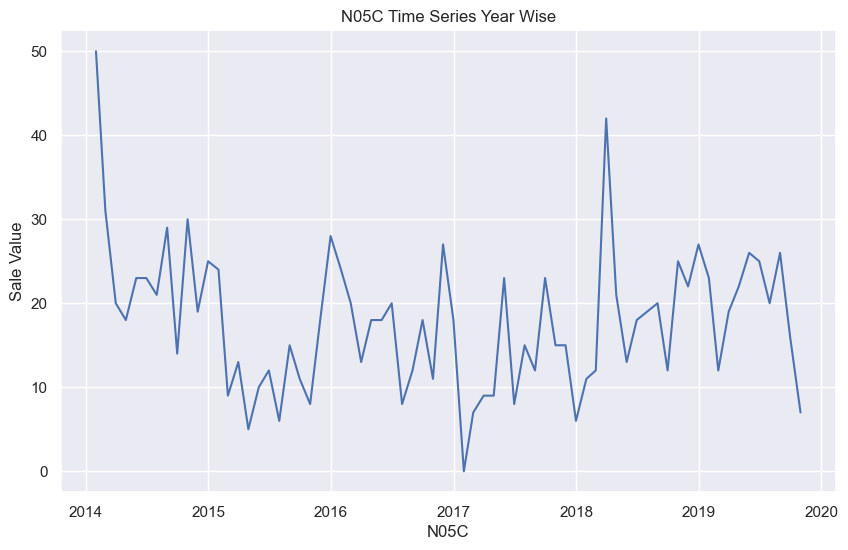

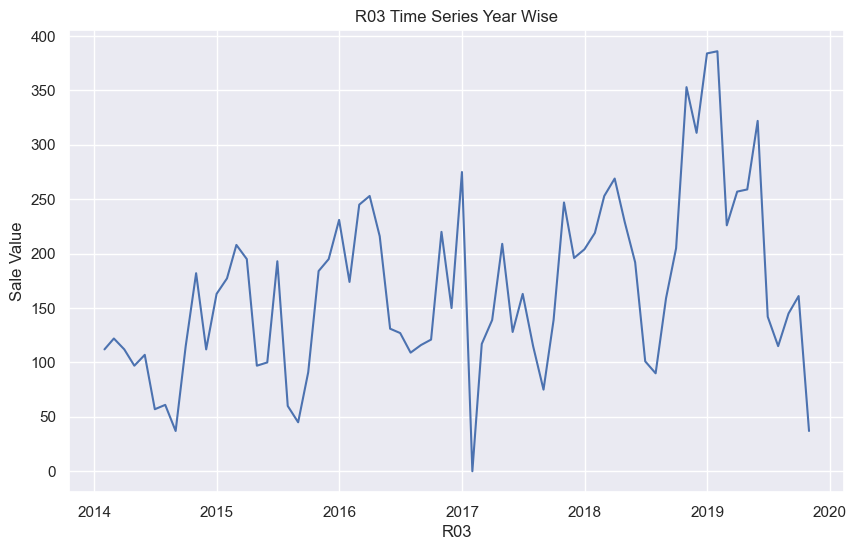

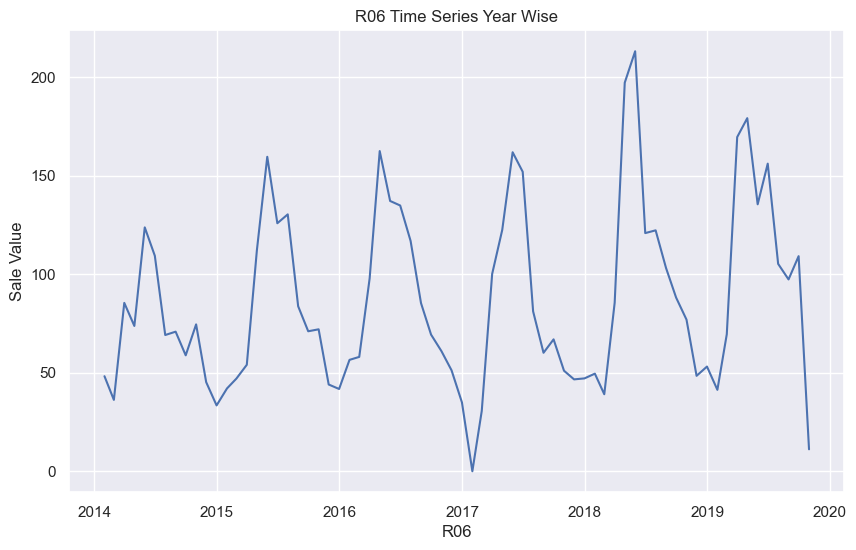

In [23]:
#Plotting timeseries of all the drug columns year wise

for column in num_col_list:
    plt.figure(figsize=(10,6))
    plt.plot(monthly.index, monthly[column])
    plt.title(f'{column} Time Series Year Wise')
    plt.xlabel(column)
    plt.ylabel('Sale Value')
    plt.show()

* For every drug, at the start of 2017 there was a noticeable drop in the sales.
* 'R06' drug had quite a bit of similarity in the trend for sales through the years 

**Calculating total monthly sales by summing sales of all the drugs**

In [26]:
monthly['total_sales'] = 0
for cols in num_col_list:
    monthly['total_sales']+= monthly[cols]


**Forecasting for total sales of drugs**

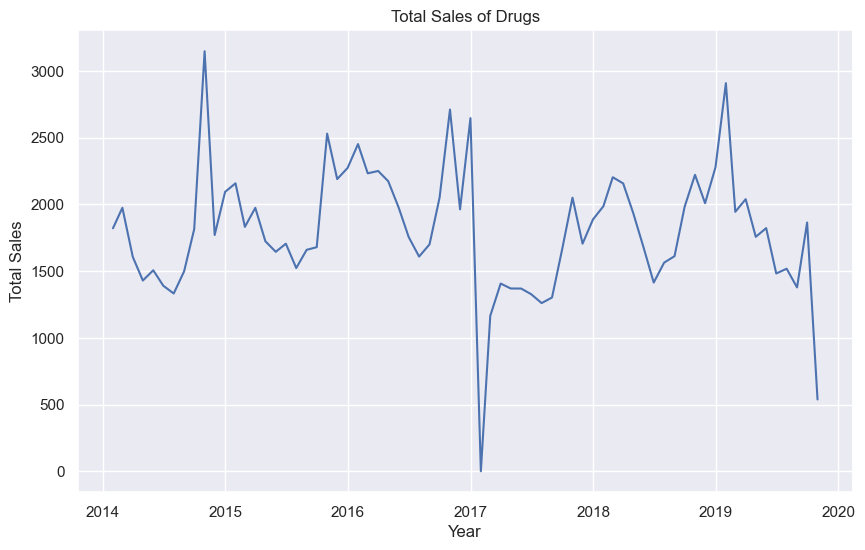

In [28]:
plt.figure(figsize = (10, 6))
plt.plot(monthly.index, monthly['total_sales'])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

* This is a **non-stationary** time series

#### Simple Moving Average

In [31]:
#Taking a window size of 4 (can be adjusted)
window_size = 4 
monthly['SMA'] = monthly['total_sales'].rolling(window = window_size, min_periods = 1).mean()

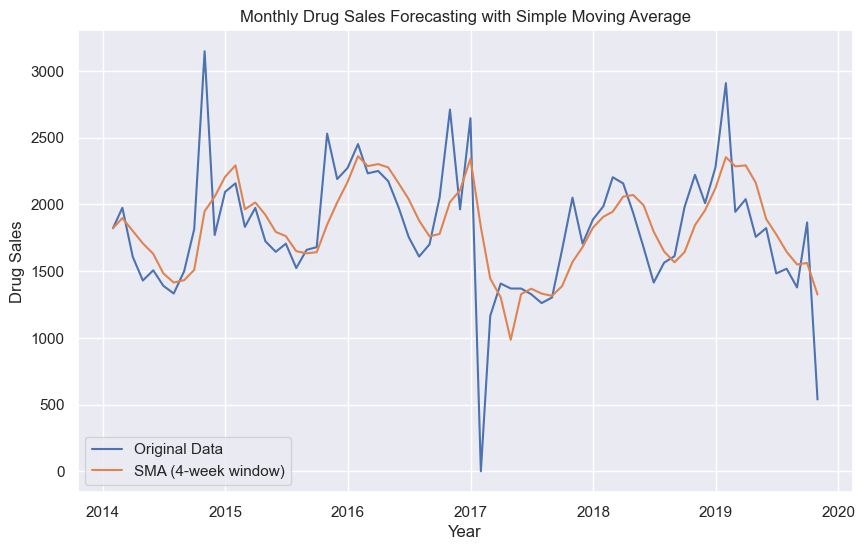

In [32]:
#Plotting original data and moving average

plt.figure(figsize = (10,6))
plt.plot(monthly.index, monthly['total_sales'], label ='Original Data')
plt.plot(monthly.index, monthly['SMA'], label = f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales Forecasting with Simple Moving Average')
plt.xlabel('Year')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()

* Simple Moving Average can be observed to have smoothened out the noise from time series.
* SMA has lower fluctuations.
* This may not be the ideal model to go with for this forecasting use-case.

#### ARIMA

**Adfuller (Augmented Dicker Fuller) test** 
* To check the stationarity of the data
* Null Hypothesis: The Data has a unit root and is non-stationary
* Alternate Hypothesis: The Data does not have a unit root and is stationary

In [35]:
#function to perform adfuller test
#Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

def check_stationarity(series):
    
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [36]:
#adf on original data
check_stationarity(monthly['total_sales'])

ADF Statistic: -3.378637
p-value: 0.011709
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
Stationary


* Since the p-value is less than 0.05 - The Null Hypothesis can be rejected
* Therefore, the data is stationary

In [38]:
#adf on SMA data
check_stationarity(monthly['SMA'])

ADF Statistic: -1.968782
p-value: 0.300427
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Non-stationary


* Since the p-value is greater than 0.05 - The Null Hypothesis is failed to be rejected
* The data is non-stationary

**ACF and PACF Plots**

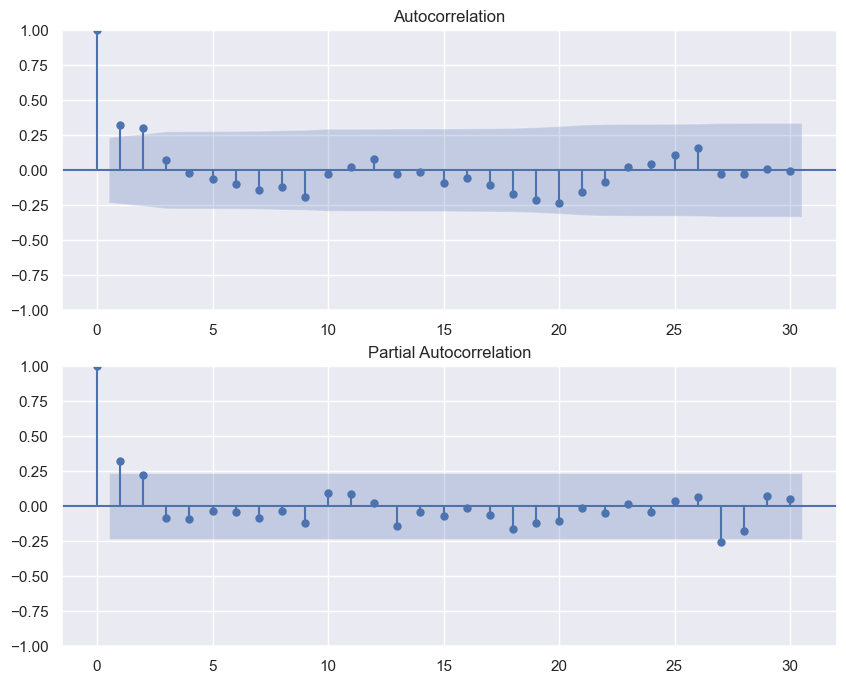

In [41]:
#inferring the frequency of the data
monthly = monthly.asfreq(pd.infer_freq(monthly.index))

#plotting ACF and PACF of the differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
sm.graphics.tsa.plot_acf(monthly['total_sales'], lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly['total_sales'], lags=30, ax=ax2)
plt.show()

* p and q should be 1,1 respectively as per the PACF and ACF plots analysis respectively

#### ARIMA Model
* **ARMA(1,1) Model** or simply **AR(1) or MA(1)** model to fit our time series

In [44]:
#Train & Test Split

train_end = dt.datetime(2019, 7, 31)

train_data = monthly[:train_end]
test_data =  monthly[train_end + dt.timedelta(days=1):]

**ARIMA Model**

In [46]:
p, d, q = 1, 0, 1 
model = sm.tsa.ARIMA(train_data["total_sales"], order = (p, d, q))
results = model.fit()

In [47]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                   67
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -500.448
Date:                Sat, 01 Jun 2024   AIC                           1008.896
Time:                        20:16:35   BIC                           1017.715
Sample:                    01-31-2014   HQIC                          1012.386
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1832.1588    127.837     14.332      0.000    1581.602    2082.715
ar.L1          0.5793      0.374      1.549      0.121      -0.154       1.313
ma.L1         -0.2488      0.444     -0.560      0.5

* The AR(1) term is positive but not statistically significant, indicating weak evidence that past sales influence current sales.
* The MA(1) term is negative and also not statistically significant, indicating weak evidence that past errors influence current sales.
* The model diagnostics indicate no issues with autocorrelation or heteroskedasticity, but the residuals are not normally distributed, which may affect inference.

**AR Model**

In [50]:
model_2 = statsmodels.tsa.ar_model.AutoReg(train_data["total_sales"], lags=1)
results_2 = model_2.fit()

In [51]:
print(results_2.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_sales   No. Observations:                   67
Model:                     AutoReg(1)   Log Likelihood                -494.001
Method:               Conditional MLE   S.D. of innovations            430.924
Date:                Sat, 01 Jun 2024   AIC                            994.003
Time:                        20:16:35   BIC                           1000.572
Sample:                    02-28-2014   HQIC                           996.599
                         - 07-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1170.2422    218.386      5.359      0.000     742.213    1598.272
total_sales.L1     0.3607      0.115      3.129      0.002       0.135       0.587
                                    

* The model indicates that "total_sales" is influenced by a significant constant level and the previous value of "total_sales" with a coefficient of 0.3607, suggesting a moderate positive influence from the past sales.
* Both the constant and the lagged term are statistically significant.
* The AIC of this model is 994.003, which is lower than the AIC of 1008.896 from the ARIMA model, indicating a better fit.

**Following the AR Model**

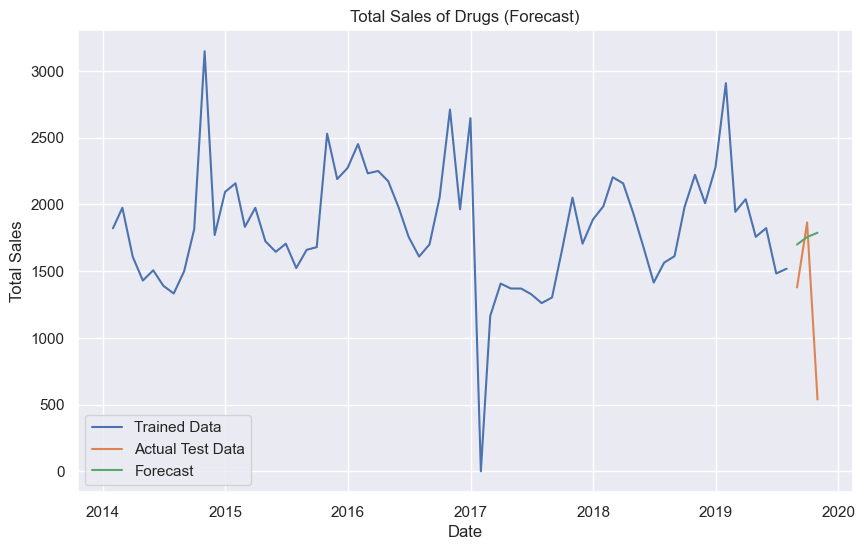

In [54]:
#Forecasting the next 3 time steps
forecast = results.forecast(steps=3)

#Plotting the forecast
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['total_sales'], label ='Trained Data')
plt.plot(test_data.index, test_data['total_sales'], label = 'Actual Test Data')
plt.plot(forecast.index, forecast, label ='Forecast')
plt.title('Total Sales of Drugs (Forecast)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [55]:
forecast

2019-08-31    1699.338198
2019-09-30    1755.209365
2019-10-31    1787.578244
Freq: M, Name: predicted_mean, dtype: float64

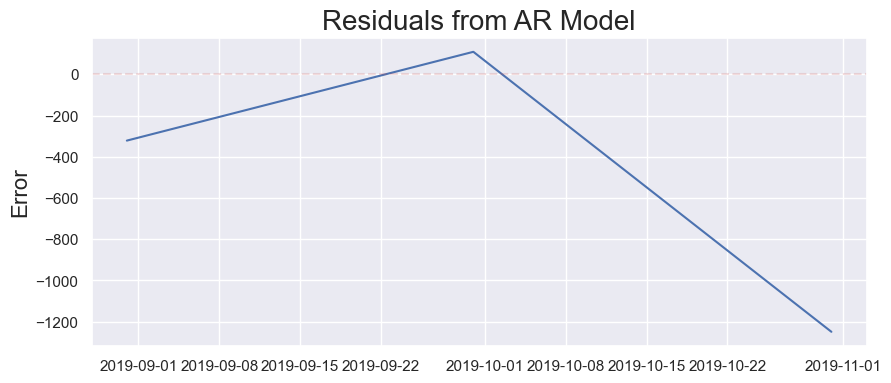

In [56]:
#plotting residuals from the AR model
residuals = test_data["total_sales"] - forecast

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize =20)
plt.ylabel('Error', fontsize = 16)
plt.axhline(0, color='r', linestyle='--', alpha = 0.2)

In [57]:
#Evaluation
print('Root Mean Squared Error: {}'.format(np.sqrt(np.mean(residuals**2))))

Root Mean Squared Error: 747.2765499900867


* On average, the model's predictions are off by about 747.28 units of total sales.
* Further improvements are necessary!